In [1]:
import numpy as np

import pympedance.Synthesiser as psy


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbce08b98d0>,
      dtype=object)

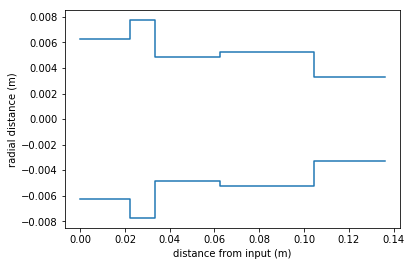

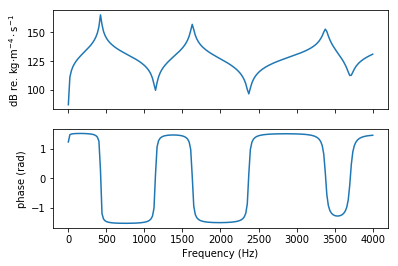

In [2]:
n_el = 5
max_l = .05
max_r = .01
min_r = .001

d = psy.Duct()


for ii in range(n_el):
    l = np.random.rand()*max_l
    r = np.random.rand()*(max_r-min_r)+min_r
    d.append_element(psy.StraightDuct(radius=r,length=l))

d.set_termination(psy.FlangedPiston(radius=r))

d.plot_geometry()
d.plot_impedance()

In [3]:
duct_l = d.get_total_length()
pos_s = np.random.rand()*duct_l
pos_e = np.random.rand()*duct_l

f = np.array([10,100,1000])

t_mx = d.transfer_mx_at_freq(f,from_pos=pos_s,to_pos=pos_e)
t_mx_i = d.transfer_mx_at_freq(f,from_pos=pos_e,to_pos=pos_s)

print(np.matmul(t_mx.transpose([2,0,1]),t_mx_i.transpose([2,0,1])).transpose([1,2,0]))
print(np.matmul(t_mx.swapaxes(2,0),t_mx_i.swapaxes(2,0)).swapaxes(2,0))


[[[ 1.00000000e+00+4.06575815e-20j  1.00000000e+00+4.33680869e-19j
    1.00000000e+00+0.00000000e+00j]
  [ 3.63797881e-12+2.91038305e-11j  0.00000000e+00+2.32830644e-10j
    2.91038305e-11+1.86264515e-09j]]

 [[-5.16987883e-26-8.27180613e-25j -2.06795153e-25+6.61744490e-24j
    4.13590306e-25-1.32348898e-23j]
  [ 1.00000000e+00+1.35525272e-20j  1.00000000e+00+8.67361738e-19j
    1.00000000e+00-3.46944695e-18j]]]
[[[ 1.00000000e+00+4.06575815e-20j  1.00000000e+00+8.67361738e-19j
    1.00000000e+00-3.46944695e-18j]
  [ 0.00000000e+00+0.00000000e+00j -1.45519152e-11+2.32830644e-10j
    2.91038305e-11-2.91038305e-10j]]

 [[ 5.16987883e-26+8.27180613e-25j  2.06795153e-25+1.98523347e-23j
    4.13590306e-25+0.00000000e+00j]
  [ 1.00000000e+00+1.35525272e-20j  1.00000000e+00+4.33680869e-19j
    1.00000000e+00+0.00000000e+00j]]]


In [4]:
print('Region of interst from %.3f to %.3f (total length %.3f)'%(pos_s,pos_e,duct_l))

for el_info in d.iter_elements_in_interval(from_pos=pos_s,to_pos=pos_e):
    el_info = [*el_info,d.element_positions[el_info[0]],el_info[1].get_length()]
    print('El nbr. {0:.3f} (starts at {4:.3f}, l={5:.3f}), {2:.3f} - {3:.3f} m'.format(*el_info))
print('Reversing...')
    
for el_info in d.iter_elements_in_interval(from_pos=pos_e,to_pos=pos_s,reverse=True):
    el_info = [*el_info,d.element_positions[el_info[0]],el_info[1].get_length()]
    print('El nbr. {0:.3f} (starts at {4:.3f}, l={5:.3f}), {2:.3f} - {3:.3f} m'.format(*el_info))

Region of interst from 0.020 to 0.126 (total length 0.136)
El nbr. 0.000 (starts at 0.000, l=0.022), 0.020 - 0.022 m
El nbr. 1.000 (starts at 0.022, l=0.011), 0.000 - 0.011 m
El nbr. 2.000 (starts at 0.034, l=0.029), 0.000 - 0.029 m
El nbr. 3.000 (starts at 0.062, l=0.042), 0.000 - 0.042 m
El nbr. 4.000 (starts at 0.104, l=0.032), 0.000 - 0.022 m
Reversing...
El nbr. 4.000 (starts at 0.104, l=0.032), 0.022 - 0.000 m
El nbr. 3.000 (starts at 0.062, l=0.042), 0.042 - 0.000 m
El nbr. 2.000 (starts at 0.034, l=0.029), 0.029 - 0.000 m
El nbr. 1.000 (starts at 0.022, l=0.011), 0.011 - 0.000 m
El nbr. 0.000 (starts at 0.000, l=0.022), 0.022 - 0.020 m


In [5]:
el=el_info[1]

In [6]:
el.get_length

<bound method DuctSection.get_length of <pympedance.Synthesiser.StraightDuct object at 0x7fbce295bc18>>